In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Prepare Data

In [2]:
# Import CSV file
cancer = pd.read_csv("breast-cancer-wisconsin.csv")
cancer.head()

,1000025,1,5,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,4,5,5,4,7,10,3,2,1,2
1,1015425,1,3,1,1,2,2,3,1,1,2
2,1016277,8,6,1,8,3,4,3,7,1,2
3,1017023,1,4,3,1,2,1,3,1,1,2
4,1017122,10,8,8,10,7,10,9,7,1,4


In [7]:
cancer.columns = ['id', 'uniform_cell_size', 'clump_thickness', 'marginal_adhesion', 'uniform_cell_shape',
'single_epithelial_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
cancer.head(50)

,id,uniform_cell_size,clump_thickness,marginal_adhesion,uniform_cell_shape,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1002945,4,5,5,4,7,10,3,2,1,2
1,1015425,1,3,1,1,2,2,3,1,1,2
2,1016277,8,6,1,8,3,4,3,7,1,2
3,1017023,1,4,3,1,2,1,3,1,1,2
4,1017122,10,8,8,10,7,10,9,7,1,4
5,1018099,1,1,1,1,2,10,3,1,1,2
6,1018561,1,2,1,2,2,1,3,1,1,2
7,1033078,1,2,1,1,2,1,1,1,5,2
8,1033078,2,4,1,1,2,1,2,1,1,2
9,1035283,1,1,1,1,1,1,3,1,1,2


In [4]:
cancer.shape

(698, 11)

In [24]:
cancer = cancer.drop(cancer[cancer.bare_nuclei == '?'].index)   
cancer = cancer.drop(columns=['id'])

cancer['bare_nuclei'] = cancer['bare_nuclei'].astype(int)
cancer.dtypes

uniform_cell_size         int64
clump_thickness           int64
marginal_adhesion         int64
uniform_cell_shape        int64
single_epithelial_size    int64
bare_nuclei               int64
bland_chromatin           int64
normal_nucleoli           int64
mitoses                   int64
class                     int64
dtype: object

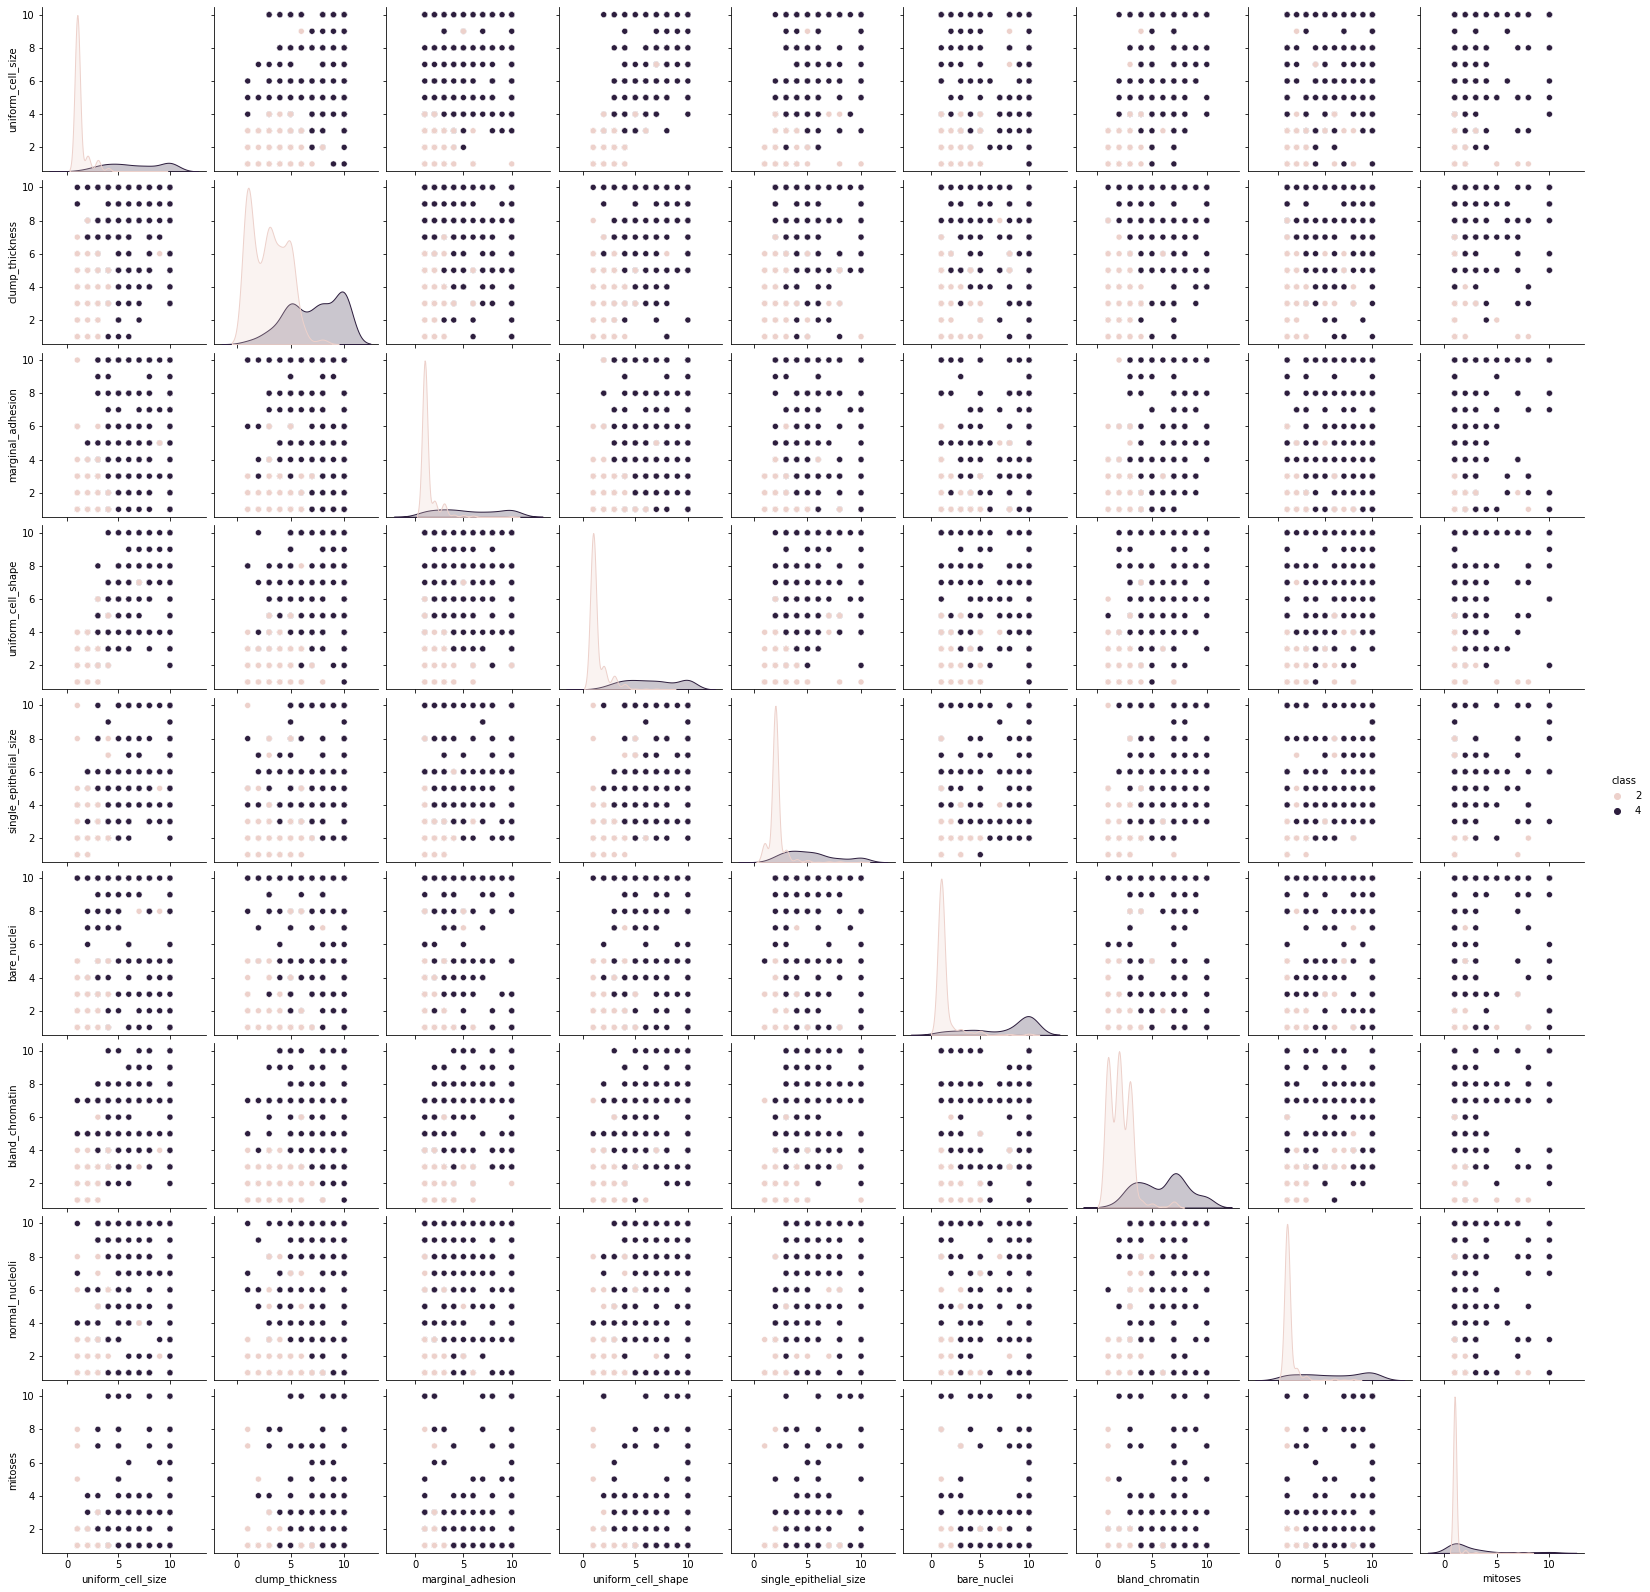

In [25]:
sns.pairplot(cancer, hue = 'class', vars = ['uniform_cell_size', 'clump_thickness', 'marginal_adhesion', 'uniform_cell_shape',
       'single_epithelial_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


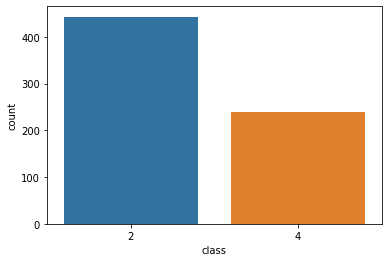

In [26]:
sns.countplot(cancer['class'], label = "Count") 

In [27]:
X = cancer.drop(['class'], axis = 1) 
X.head()

,uniform_cell_size,clump_thickness,marginal_adhesion,uniform_cell_shape,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,4,5,5,4,7,10,3,2,1
1,1,3,1,1,2,2,3,1,1
2,8,6,1,8,3,4,3,7,1
3,1,4,3,1,2,1,3,1,1
4,10,8,8,10,7,10,9,7,1


In [28]:
y = cancer['class']
y.head()

0    2
1    2
2    2
3    2
4    4
Name: class, dtype: int64

In [29]:
x_train = X[:600]
y_train = y[:600]

In [30]:
x_train

,uniform_cell_size,clump_thickness,marginal_adhesion,uniform_cell_shape,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,4,5,5,4,7,10,3,2,1
1,1,3,1,1,2,2,3,1,1
2,8,6,1,8,3,4,3,7,1
3,1,4,3,1,2,1,3,1,1
4,10,8,8,10,7,10,9,7,1
...,...,...,...,...,...,...,...,...,...
610,10,5,10,10,5,2,8,5,1
611,10,8,10,10,6,10,10,10,10
612,3,2,1,1,2,1,2,1,1
613,1,2,1,1,1,1,2,1,1


In [32]:
x_test = X[600:]
y_test = y[600:]

In [33]:
x_test

,uniform_cell_size,clump_thickness,marginal_adhesion,uniform_cell_shape,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
615,1,3,1,1,2,1,2,1,1
617,1,4,1,1,2,1,2,1,1
618,1,5,1,1,2,1,2,1,1
619,1,3,1,1,2,1,2,1,1
620,3,6,3,3,3,2,6,1,1
...,...,...,...,...,...,...,...,...,...
693,1,3,1,1,3,2,1,1,1
694,1,2,1,1,2,1,1,1,1
695,10,5,3,10,7,3,8,10,2
696,8,4,4,6,3,4,10,6,1


# SVM

In [34]:
from sklearn.svm import SVC
svc_model = SVC()

svc_model.fit(x_train, y_train)

SVC()

In [35]:
y_predict = svc_model.predict(x_test)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.99      0.99        68
           4       0.93      1.00      0.97        14

    accuracy                           0.99        82
   macro avg       0.97      0.99      0.98        82
weighted avg       0.99      0.99      0.99        82



# KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [42]:
accs = []

for i in range(1, 50):
    neighbour = KNeighborsClassifier(n_neighbors=i)
    neighbour.fit(x_train, y_train)
    y_predict = neighbour.predict(x_test)
    accs.append(metrics.accuracy_score(y_test, y_predict))

In [43]:
print(accs)

[0.9878048780487805, 0.9878048780487805, 0.975609756097561, 0.9878048780487805, 0.9878048780487805, 0.9878048780487805, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


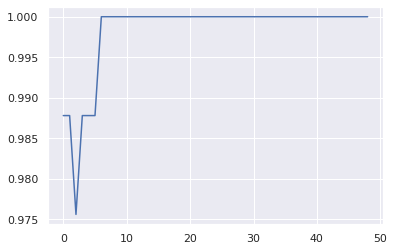

In [48]:
sns.set_theme(style="darkgrid")
sns.lineplot(x=np.arange(49), y=accs)